# Task 2

---

## Predictive modeling of customer bookings


First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([nan])

In [13]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,NaN,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,NaN,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Now we have select Algorithm to predict bookings in future. https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [18]:
print(df.columns)  # Check available columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Mobile',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=913)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
# df = pd.read_csv("flight_booking_data.csv")

# Ensure column names are standardized (strip spaces, lowercase)
df.columns = df.columns.str.strip().str.lower()

# Separate features (X) and target (y)
X = df.drop(columns=["num_passengers"])  # Features
y = df["num_passengers"]  # Target variable (number of passengers)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Example: Predict future bookings for new data
future_data = pd.DataFrame({
    "purchase_lead": [20],
    "length_of_stay": [5],
    "flight_hour": [10],
    "wants_extra_baggage": [1],
    "wants_preferred_seat": [0],
    "wants_in_flight_meals": [1],
    "flight_duration": [6],
    "booking_complete": [1],
    "sales_channel_mobile": [1],
    "sales_channel_online": [0],  # Example for one-hot encoded sales_channel
    "route_nyc-lax": [1],
    "route_lax-nyc": [0],
    "booking_origin_united states": [1],
    "booking_origin_india": [0],
})

# Align future_data with X_train columns (including adding missing columns)
missing_cols = set(X_train.columns) - set(future_data.columns)
for col in missing_cols:
    future_data[col] = 0  # Add missing columns with 0 values

# Make sure the column order matches
future_data = future_data[X_train.columns]

# Make predictions for future bookings
future_predictions = rf_model.predict(future_data)
print(f"Predicted Number of Passengers for Future Booking: {future_predictions[0]}")


Mean Absolute Error: 0.6292749964285714
Root Mean Squared Error: 0.9981842885614425


C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Add missing columns with 0 values
C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Add missing columns with 0 values
C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

Predicted Number of Passengers for Future Booking: 1.71


C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Add missing columns with 0 values
C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[col] = 0  # Add missing columns with 0 values
C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\1528754269.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [23]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset Overview:
    num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  sales_channel_mobile  ...  \
0             5.52                 0                 False  ...   
1             5.52           

C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\3964640134.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\3964640134.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Model Performance:
✅ Accuracy: 0.85
✅ AUC-ROC Score: 0.57

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.50      0.16      0.24      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.57      0.58     10000
weighted avg       0.82      0.85      0.82     10000



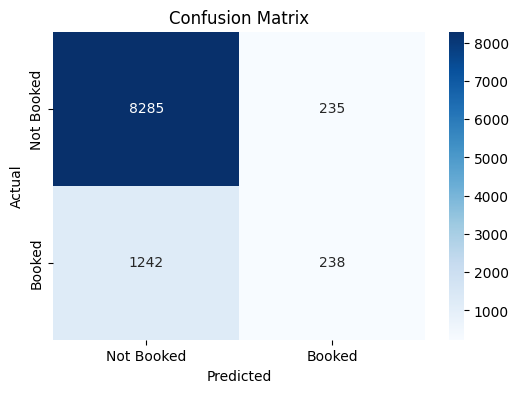

C:\Users\Manas\AppData\Local\Temp\ipykernel_18768\3964640134.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


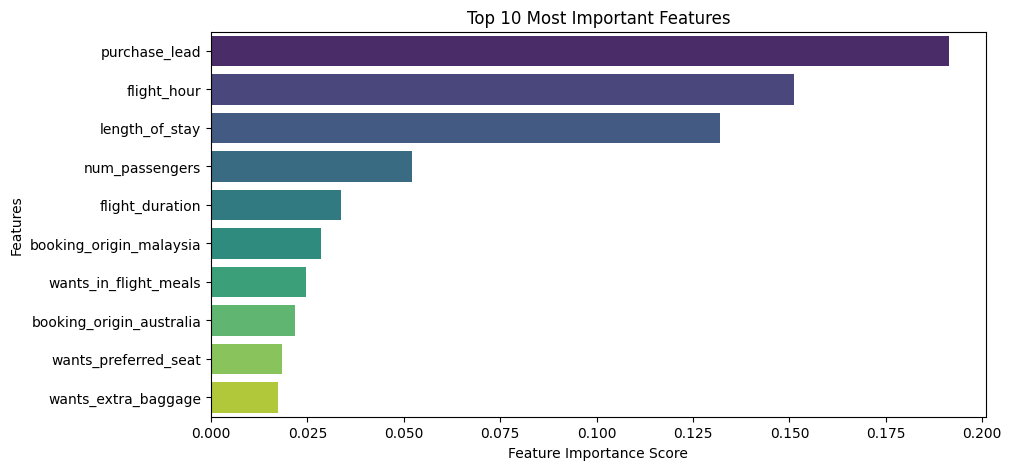


✅ Summary saved for PowerPoint.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load Dataset
# df = pd.read_csv("flight_booking_data.csv")  # Replace with actual file path

# 2️⃣ Explore Data
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())  # Check for missing values
print("\nBasic Statistics:\n", df.describe())

# 3️⃣ Data Preprocessing
df.columns = df.columns.str.strip().str.lower()  # Standardize column names

# Fill missing values (Assuming categorical as 'Unknown' and numerical with median)
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna("Unknown", inplace=True)
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# 4️⃣ Define Features (X) and Target (y)
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target: 1 if booking completed, 0 otherwise

# Normalize numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=["float64", "int64"]).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=["float64", "int64"]).columns]
)

# 5️⃣ Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7️⃣ Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance:")
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ AUC-ROC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8️⃣ Feature Importance Visualization
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features")
plt.show()

# 9️⃣ Save Key Insights for PowerPoint
summary = {
    "Accuracy": accuracy,
    "AUC-ROC Score": roc_auc,
    "Top Features": feature_importances[:5].to_dict()
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv("model_summary.csv", index=False)
print("\n✅ Summary saved for PowerPoint.")
